In [ ]:
import numpy as np
import pandas as pd
import datetime
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
import itertools
import statsmodels.api as sm
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.metrics import mean_squared_error
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import seaborn as sns
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

In [ ]:
df0 = pd.read_csv('ORDER_RECIPE_TOTAL.csv')
df0

,ORDER_ID,COMPARTMENT_ID,ORDER_RECIPE_ID,BAY_CODE,API_CODE,INJECTOR_PRESET_CODE,TARE_SCALE_INTERFACE_CODE,TANK_CODE,PRODUCT_GROUP_CODE,INJECTOR_CODE,...,COMPARTMENT_CONTAINER_TYPE,COMPARTMENT_NUMBER,PDXR_LOADING_REF,BLEND_CORRECTION_METHOD,BLEND_CORRECTION_NET_VOLUME,TOTAL_BATCH_BLEND_NET_VOLUME,BLEND_CORRECTION_SOURCE,COMMODITY_GROUP,DERIVATION_STATUS,DERIVED_VALUES_ERROR
0,8320,8342,8343,NaN,54B,NaN,NaN,NaN,DSL,NaN,...,NaN,NaN,NaN,0,0,0,0,2,0,NaN
1,8320,8344,8345,NaN,54B,NaN,NaN,NaN,DSL,NaN,...,NaN,NaN,NaN,0,0,0,0,2,0,NaN
2,8320,8346,8347,NaN,54B,NaN,NaN,NaN,DSL,NaN,...,NaN,NaN,NaN,0,0,0,0,2,0,NaN
3,8320,8348,8349,BAY_300,54B,NaN,NaN,TK-205,DSL,NaN,...,1.0,NaN,NaN,0,0,0,0,2,0,NaN
4,8320,8350,8351,NaN,54B,NaN,NaN,NaN,DSL,NaN,...,NaN,NaN,NaN,0,0,0,0,2,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498060,3099018,3099047,3099049,BAY_400,NaN,FIQ_402,NaN,TK-200,ADD,INJ_402,...,1.0,NaN,NaN,0,0,0,0,0,0,NaN
498061,3099018,3099050,3099051,NaN,NaN,NaN,NaN,NaN,DSL,NaN,...,NaN,NaN,NaN,0,0,0,0,0,0,NaN
498062,3099018,3099050,3099052,NaN,NaN,NaN,NaN,NaN,ADD,NaN,...,NaN,NaN,NaN,0,0,0,0,0,0,NaN
498063,3099018,3099053,3099054,NaN,NaN,NaN,NaN,NaN,DSL,NaN,...,NaN,NaN,NaN,0,0,0,0,0,0,NaN


In [ ]:
df1 = df0.drop(['COMPARTMENT_ID','PDXR_AUTHORIZATION_UNITS','MEASURED_QUANTITY_TYPE','COMMITTED_CONV_COE','COMMITTED_CONV_PRESSURE',
               'INVENTORY_QUANTITY_TYPE','DERIVED_VALUES_DIRECTIVE','ADJUSTMENT_BATCH','COMMODITY_GROUP','CALCULATE_NET',
               'DERIVATION_STATUS','TOTAL_BATCH_BLEND_NET_VOLUME','PRESSURE','NON_RECIPE_WEIGHT_IN_VAC','BLEND_CORRECTION_METHOD',
               'BLEND_CORRECTION_NET_VOLUME','BLEND_CORRECTION_SOURCE','ORDER_ID','ORDER_RECIPE_ID','API_CODE','HOST_PRODUCT_CODE',
               'PDXR_ADDITIVE_CODE','PDXR_PRODUCT_CODE','REDUCED_PRODUCT_NUMBER','INJECTOR_PRESET_CODE','INJECTOR_CODE','BAY_CODE',
               'HOST_PRODUCT_NAME','PETROEX_COMPONENT_PRODUCT_CODE','FINAL_SCALE_INTERFACE_CODE','TARE_SCALE_INTERFACE_CODE','TANK_CODE',
               'METER_CODE','SHOST_SI_HOST_PRODUCT_NUMBER','THOST_TI_HOST_PRODUCT_NUMBER','LAST_MODIFIED','LAST_USER_NAME','METER_PRESET_CODE',
               'COMPARTMENT_OWNER_ID','COMPARTMENT_CONTAINER_CODE','COMPARTMENT_CONTAINER_TYPE','COMPARTMENT_NUMBER','PDXR_LOADING_REF',
               'DERIVED_VALUES_ERROR','BLEND_PERCENT','VRU_CODE','RT_INJECTOR_ALARM_COUNT','RATE','OVERRIDE_TEMPERATURE_ENABLE',
               'COMMITTED_WEIGHT_IN_AIR','COMMITTED_WEIGHT_IN_VAC','COMPATIBILITY_STATUS','NON_RECIPE_WEIGHT','BLEND_PERCENT',
               'COMMITTED_CONV_DENSITY','ADDITIVE_WEIGHT_IN_VAC','PRODUCT_WEIGHT_IN_VAC','WEIGHT_IN_VAC','NON_RECIPE_NET_QUANTITY',
               'NON_RECIPE_GROSS_QUANTITY','WEIGHT_IN_VAC','NON_RECIPE_NET_QUANTITY','NON_RECIPE_GROSS_QUANTITY','RECIPE_CORRECTION_TYPE',
               'COMPATIBILITY_STATUS','ADDITIVE_MASKING','CUSTOMER_NET_QUANTITY','DENSITY','NET_QUANTITY','WEIGHT','PRODUCT_TOLERANCE_STATUS',
               'SPECIFIC_GRAVITY','COEFFICIENT_EXPANSION','TEMPERATURE','RVP','PRODUCT_TOLERANCE_STATUS','TANK_INVENTORY_UPDATED','TOTALIZER_UPDATED',
               'FLUSH_STATUS','ADDITIVE_WEIGHT','PRODUCT_WEIGHT','BATCH_NUMBER','FRAC_END_GROSS_TOTALIZER','START_GROSS_TOTALIZER','END_GROSS_TOTALIZER',
               'START_NET_TOTALIZER','FROM_LEFT_ON_TRUCK','OBSERVED_DENSITY','COMPONENT_ID','CALCULATE_SECONDARY_UNITS','FRAC_START_GROSS_TOTALIZER',
               'TERMINAL_PRODUCT_TYPE','END_WEIGHT','START_WEIGHT','END_NET_TOTALIZER','OXYGEN','GROSS_QUANTITY','TERMINAL_PRODUCT_NUMBER','COMMITTED_CONV_TEMPERATURE',
               'COMMITTED_GROSS_QUANTITY','COMMITTED_NET_QUANTITY','END_TIME','SUPPLIER_NUMBER','ADDITIVE_QUANTITY','PRODUCT_QUANTITY'], axis=1)

In [ ]:
df1['PRODUCT_GROUP_CODE'].unique()

array(['DSL', 'GAS', 'ADD', 'HFO'], dtype=object)

In [ ]:
df1 = df1[df1['ORDERED_QUANTITY'] != 0]

In [ ]:
fassakh=df1.isnull().sum()
print(fassakh[fassakh > 0])

START_TIME    16020
dtype: int64


In [ ]:
# Forward Fill: fill missing dates with the last observed value
df1['START_TIME'] = df1['START_TIME'].fillna(method='ffill')

In [ ]:
df1['START_TIME'] = pd.to_datetime(df1['START_TIME']).dt.date
df1 = df1.dropna(subset=['START_TIME'])
df1

,PRODUCT_GROUP_CODE,ORDERED_QUANTITY,START_TIME
3,DSL,671,2021-09-24
4,DSL,100,2021-09-24
5,DSL,100,2021-09-24
6,DSL,100,2021-09-24
7,DSL,8000,2021-09-24
...,...,...,...
498060,ADD,300,2023-07-20
498061,DSL,2000,2023-07-20
498062,ADD,200,2023-07-20
498063,DSL,6000,2023-07-20


In [ ]:
df1['PRODUCT_GROUP_CODE'].unique()

array(['DSL', 'GAS', 'ADD'], dtype=object)

In [ ]:
df1['START_TIME'] = pd.to_datetime(df1['START_TIME']).dt.date
df1.set_index('START_TIME', inplace=True)
"""df1=df1.loc[datetime.date(year=2021,month=12,day=1):]"""

'df1=df1.loc[datetime.date(year=2021,month=12,day=1):]'

In [ ]:
df1.PRODUCT_GROUP_CODE.value_counts(normalize=True)

PRODUCT_GROUP_CODE
DSL    0.652660
ADD    0.222179
GAS    0.125161
Name: proportion, dtype: float64

In [ ]:
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from keras.layers import Input
from keras.models import Model

# Aggregate duplicate entries (e.g., sum)
df_aggregated = df1.groupby(['START_TIME', 'PRODUCT_GROUP_CODE']).sum().reset_index()

# Pivot the DataFrame
df_pivoted = df_aggregated.pivot(index='START_TIME', columns='PRODUCT_GROUP_CODE', values='ORDERED_QUANTITY')

# Fill missing values with 0
df_pivoted = df_pivoted.fillna(0)

# Reset index
df_pivoted.reset_index(inplace=True)

# Split data into input features (X) and target labels (y)
X = df_pivoted.drop(['START_TIME'], axis=1)  # Input features (all product groups)
y = df_pivoted.drop(['START_TIME'], axis=1)  # Target labels (ordered quantities for all product groups)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Define multi-output model architecture with dropout regularization
input_layer = Input(shape=(X_train.shape[1],))
hidden1 = Dense(64, activation='relu')(input_layer)
dropout1 = Dropout(0.2)(hidden1)  # Add dropout regularization
hidden2 = Dense(32, activation='relu')(dropout1)
dropout2 = Dropout(0.2)(hidden2)  # Add dropout regularization
output_layer = Dense(3, activation='softmax')(dropout2)  # Adjust output nodes to 4

# Define the model
model = Model(inputs=input_layer, outputs=output_layer)


# Compile the model with the appropriate learning rate and loss function
optimizer = Adam(learning_rate=0.001)  # Adjust the learning rate
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
from keras.callbacks import EarlyStopping

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min', restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=5)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=15, validation_data=(X_test, y_test), callbacks=[reduce_lr,early_stopping])

Epoch 1/100
36/36 [==============================] - 2s 16ms/step - loss: 1478724288512.0000 - accuracy: 0.9221 - val_loss: 2787138600960.0000 - val_accuracy: 0.9015 - lr: 0.0010
Epoch 2/100
36/36 [==============================] - 0s 3ms/step - loss: 4815362457600.0000 - accuracy: 0.9278 - val_loss: 7470331199488.0000 - val_accuracy: 0.9015 - lr: 0.0010
Epoch 3/100
36/36 [==============================] - 0s 3ms/step - loss: 10969174507520.0000 - accuracy: 0.9278 - val_loss: 15244987465728.0000 - val_accuracy: 0.9015 - lr: 0.0010
Epoch 4/100
36/36 [==============================] - 0s 3ms/step - loss: 20787719307264.0000 - accuracy: 0.9278 - val_loss: 27413314535424.0000 - val_accuracy: 0.9015 - lr: 0.0010
Epoch 5/100
36/36 [==============================] - 0s 3ms/step - loss: 35250595954688.0000 - accuracy: 0.9278 - val_loss: 44062434394112.0000 - val_accuracy: 0.9015 - lr: 0.0010
Epoch 6/100
36/36 [==============================] - 0s 4ms/step - loss: 52562346639360.0000 - accuracy

In [ ]:
# Evaluate model performance
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

# Make predictions
predictions = model.predict(X_test.tail(15))
predictions

5/5 [==============================] - 0s 4ms/step - loss: 2787138863104.0000 - accuracy: 0.9015
Test Loss: 2787138863104.0, Test Accuracy: 0.9015151262283325
1/1 [==============================] - 0s 104ms/step


array([[0.        , 0.99999994, 0.        ],
       [0.        , 0.99999994, 0.        ],
       [0.        , 0.99999994, 0.        ],
       [0.        , 0.99999994, 0.        ],
       [0.        , 0.99999994, 0.        ],
       [0.        , 0.99999994, 0.        ],
       [0.        , 0.99999994, 0.        ],
       [0.        , 0.99999994, 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ]], dtype=float32)

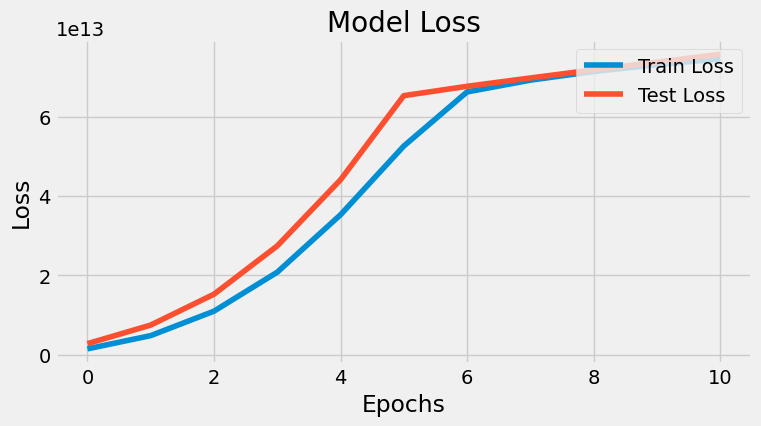

In [ ]:
# Plot loss
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc='upper right')
plt.show()


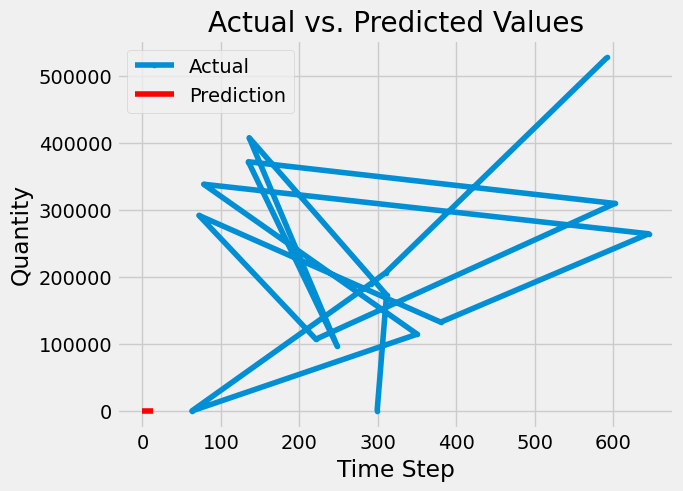

In [ ]:
# Assuming the correct column in y_test is at index 0
plt.plot(y_test.iloc[:,0][:16], marker='.', label="Actual")
plt.plot(predictions[:,0][:16], 'r', label="Prediction")
plt.title('Actual vs. Predicted Values')
plt.ylabel('Quantity')
plt.xlabel('Time Step')
plt.legend()
plt.show()